In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

In [3]:
df = pd.read_csv("Final_Dataset.csv")
df = df.drop(['Unnamed: 0'], axis=1)

In [4]:
df.head()

,Text,IsHatespeech
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727119 entries, 0 to 727118
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          727119 non-null  object
 1   IsHatespeech  727119 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ MB


In [6]:
# Check for missing values
print(df.isnull().sum())

Text            0
IsHatespeech    0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicate rows
df = df.drop_duplicates()


25050


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702069 entries, 0 to 727118
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Text          702069 non-null  object
 1   IsHatespeech  702069 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 16.1+ MB


1    359235
0    342834
Name: IsHatespeech, dtype: int64


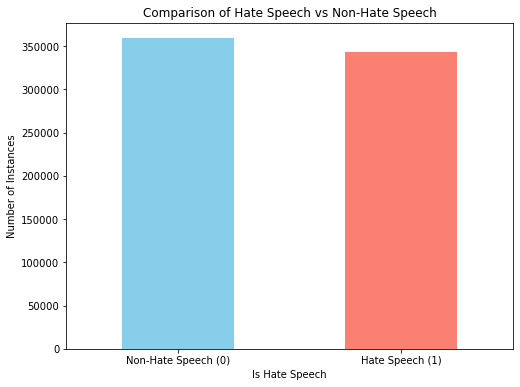

In [9]:

class_counts = df["IsHatespeech"].value_counts()
print(class_counts)
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Comparison of Hate Speech vs Non-Hate Speech')
plt.xlabel('Is Hate Speech')
plt.ylabel('Number of Instances')
plt.xticks(ticks=[0, 1], labels=['Non-Hate Speech (0)', 'Hate Speech (1)'], rotation=0)
plt.show()

In [10]:
df.head(5)

,Text,IsHatespeech
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [11]:
3
df['Text'] = df['Text'].str.lower()


In [12]:
import string

# Define a function to remove punctuation and numbers
def remove_noise(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['Text'] = df['Text'].apply(remove_noise)


In [13]:
# Tokenize the text
df['tokens'] = df['Text'].apply(lambda x: x.split())


In [14]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df.head()

,Text,IsHatespeech,tokens
0,denial of normal the con be asked to comment o...,1,"[denial, normal, con, asked, comment, tragedie..."
1,just by being able to tweet this insufferable ...,1,"[able, tweet, insufferable, bullshit, proves, ..."
2,that is retarded you too cute to be single tha...,1,"[retarded, cute, single, life]"
3,thought of a real badass mongol style declarat...,1,"[thought, real, badass, mongol, style, declara..."
4,afro american basho,1,"[afro, american, basho]"


In [16]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]
df['tokens'] = df['tokens'].apply(lemmatize_tokens)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# Reassemble tokens into cleaned text
df['clean_text'] = df['tokens'].apply(lambda x: ' '.join(x))


In [18]:
# Remove special characters and emojis
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_special_characters)

In [19]:
# Remove URLs, mentions, and hashtags
def remove_urls_mentions_hashtags(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    return text

df['clean_text'] = df['clean_text'].apply(remove_urls_mentions_hashtags)

In [20]:
# Create a feature for text length
df['text_length'] = df['clean_text'].apply(len)


In [21]:
df.head(3)

,Text,IsHatespeech,tokens,clean_text,text_length
0,denial of normal the con be asked to comment o...,1,"[denial, normal, con, asked, comment, tragedy,...",denial normal con asked comment tragedy emotio...,56
1,just by being able to tweet this insufferable ...,1,"[able, tweet, insufferable, bullshit, prof, tr...",able tweet insufferable bullshit prof trump na...,55
2,that is retarded you too cute to be single tha...,1,"[retarded, cute, single, life]",retarded cute single life,25


In [22]:
# df.to_csv('cleaned_Final_dataset.csv', index=False)


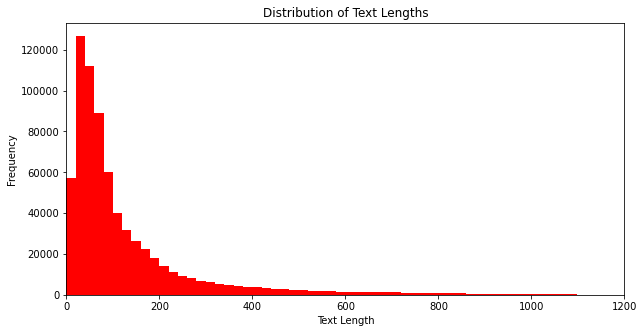

In [30]:

plt.figure(figsize=(10, 5))
df['text_length'].plot(kind='hist', bins=500, color='RED')
plt.title('Distribution of Text Lengths')
plt.xlim(0, 1200)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


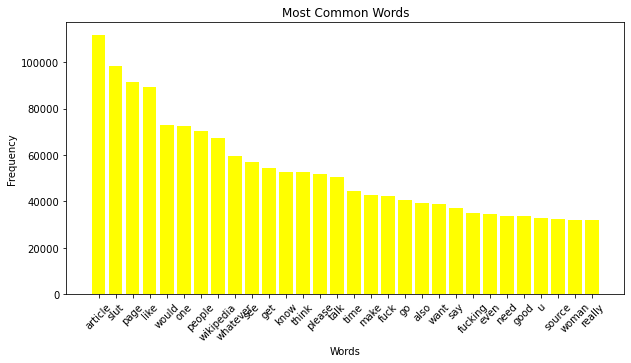

In [34]:
from collections import Counter

all_words = ' '.join(df["clean_text"]).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(25)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='Yellow')
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
